### This function streaks-a-fy a photo

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy as sp
from scipy import signal
import os

In [5]:
def streaking_image(img, max_prop = 0.25, mode='reflect', axis=0):
    dim = img.shape[:2]
    max_len = dim[axis]*max_prop
    #noise = np.random.randint(0, int(max_len), size=dim[1-axis])
    
    # 
    noise = sp.signal.detrend(np.cumsum(np.random.randn(dim[1-axis])))
    noise = ((noise-noise.min())/(noise.max()-noise.min())*max_len).astype(int)
    
    #noise = ((np.cos(np.arange(dim[1-axis])/1000*2*np.pi)+1.)*max_len/2).astype(int)+1
    img2 = np.copy(img)
    if mode is 'reflect':
        extent = int(dim[1-axis]/2)
    else:
        extent = int(dim[1-axis])
    for i in range(extent):
        if axis is 0:
            img2[:noise[i],i,:] = img[noise[i],i,:]
            img2[-noise[i]:,i,:] = img[-noise[i],i,:]
            img2[:noise[i],-i,:] = img[noise[i],-i,:]
            img2[-noise[i]:,-i,:] = img[-noise[i],-i,:]
        elif axis is 1:
            img2[i,:noise[i],:] = img[i,noise[i],:]
            img2[i,-noise[i]:,:] = img[i,-noise[i],:]
            img2[-i,:noise[i],:] = img[-i,noise[i],:]
            img2[-i,-noise[i]:,:] = img[-i,-noise[i],:]

    return img2

In [25]:
img_path = '/Users/rdgao/Documents/code/rdgao.github.io/assets/images/singles/O.jpg'
img_path_st = '/Users/rdgao/Documents/code/rdgao.github.io/assets/images/singles/O_streak.jpg'
img_mat = cv2.imread(img_path)
#plt.matshow(img_mat)
#cv2.imwrite(tn_img, output_img)

True

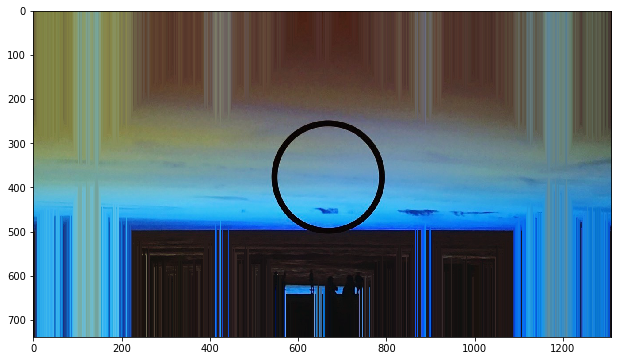

In [31]:
#plt.imshow(img_mat)
img_2 = streaking_image(img_mat, max_prop=0.5, axis=0)
plt.figure(figsize=(15,6))
plt.imshow(img_2)
cv2.imwrite(img_path_st, img_2)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import resizeimages as ri

In [6]:
img_folders = ['/Users/rdgao/Documents/code/rdgao.github.io/assets/images/projects/',
               '/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog/',
               '/Users/rdgao/Documents/code/rdgao.github.io/assets/images/singles/']

image_types = ['.jpg', '.png', '.tif', '.gif']

resize_option = 'pad' # 'pad' 'crop'
resize_unit = 'pixel'#, 'pixel' #aspect
target_dim = [500,500] # width, height
always_overwrite = True

#img_folder = '/Users/rdgao/Documents/code/rdgao.github.io/assets/images/projects/'
#ri.thumbnail_everything(img_folder, [2,1], 'pad', 'aspect', 255, image_types, always_overwrite)

img_folder = '/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog/'
ri.thumbnail_everything(img_folder, [1,1], 'crop', 'aspect', 0, image_types, always_overwrite)

# img_folder = '/Users/rdgao/Documents/code/rdgao.github.io/assets/images/projects/'
# ri.thumbnail_everything(img_folder, target_dim, resize_option, resize_unit, 255, image_types, always_overwrite)

/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2017-10-16-hawaii-lavastone.jpg
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2017-09-18-paper1-model.png
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2017-02-26-science-belief.png
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2017-10-16-hawaii-waves.jpg
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2017-10-16-hawaii-valley.jpg
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2014-08-10-rgao-eu2014-equipment.jpg
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2017-10-16-hawaii-sharp.jpg
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2017-08-26-ray.png
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/default_header.jpg
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2015-09-24

/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2017-10-16-hawaii-hanauma.jpg
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2018-09-20-refman-pp-app2.png
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2018-09-20-refman-pp-app3.png
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2018-09-20-refman-pp-1.png
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2018-07-21-jekyllfb.png
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2014-07-03-spurs-2.jpg
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2018-09-20-refman-zo-3.png
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2018-09-20-refman-f1-6.png
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2017-03-24-cycles1.jpg
/Users/rdgao/Documents/code/rdgao.github.io/assets/images/blog//thumbnail/2017-04-09-TA-2.png

In [2]:
# def return_resized_img(img, target_dim, resize_option, resize_unit='aspect', pad_color=255):
#     target_dim = np.flip(np.array(target_dim),0)
#     input_dim = np.array(img.shape[:2]).astype(int)
#     center_pixel = (0.5*input_dim).astype(int)
#     input_ratio = input_dim/input_dim[0]
#     output_ratio = target_dim/target_dim[0] # compute aspect ratio based on width (width is always 1)

#     if output_ratio[1]>input_ratio[1]:
#         # normed output width greater than input width 
#         if resize_option is 'pad':
#             # --> hold height constant & increase width to match output ratio
#             output_dim = np.ceil(np.array([input_dim[0],input_dim[0]*output_ratio[1]])).astype(int)
#             start_pix = int((output_dim[1]-input_dim[1])/2)
#             output_img = pad_color*np.ones((output_dim[0],output_dim[1],3))
#             output_img[:,start_pix:start_pix+input_dim[1],:] = img
#         elif resize_option is 'crop':
#             # --> hold width constant & decrease height to match output ratio
#             output_dim = np.ceil(np.array([input_dim[1]/output_ratio[1],input_dim[1]])).astype(int)
#             start_pix = int((input_dim[0]-output_dim[0])/2)
#             output_img = img[start_pix:start_pix+output_dim[0],:,:]
#     else:
#         # normed output width less than input width 
#         if resize_option is 'pad':
#             # --> hold width constant & increase height to match output ratio        
#             output_dim = np.ceil(np.array([input_dim[1]/output_ratio[1],input_dim[1]])).astype(int)
#             start_pix = int((output_dim[0]-input_dim[0])/2)
#             output_img = pad_color*np.ones((output_dim[0],output_dim[1],3))
#             output_img[start_pix:start_pix+input_dim[0],:,:] = img
#         elif resize_option is 'crop':
#             # --> hold height constant & decrease width to match output ratio        
#             output_dim = np.ceil(np.array([input_dim[0],input_dim[0]*output_ratio[1]])).astype(int)
#             start_pix = int((input_dim[1]-output_dim[1])/2)
#             output_img = img[:,start_pix:start_pix+output_dim[1],:]
    
#     if resize_unit is 'aspect':
#         return output_img.astype('uint8')
#     elif resize_unit is 'pixel':
#         return cv2.resize(output_img, dsize=(target_dim[1],target_dim[0])).astype('uint8')
    
# def is_an_image(img_name, image_types=['.png', '.jpg']):
#     is_image = False
#     for t in image_types:
#         if t in img_name.lower():
#             is_image = True
#     return is_image

# def thumbnail_everything(img_folder, target_dim, resize_option, resize_unit, image_types, always_overwrite):
#     # make output folder
#     output_folder = img_folder+'/thumbnail/'
#     if not os.path.isdir(output_folder):
#         os.mkdir(output_folder)
#         print('')
    
#     # grab all image files in folder
#     images = [im for im in os.listdir(img_folder) if is_an_image(im, image_types)]
#     for img in images:
#         # convert
#         tn_img = output_folder+'tn_'+img
#         if always_overwrite or ~os.path.isfile(tn_img):
#             img_mat = cv2.imread(img_folder+img)
#             output_img = return_resized_img(img_mat, target_dim, resize_option, resize_unit)
#             cv2.imwrite(tn_img, output_img)
            